# Assignment 6
### Did Q2, 3, 5, and 6

### 2. Probability space basics:

- What are the outcomes for rolling a single, fair **THREE**-sided die? What's the set of all events? What are the probabilities of all the events?


## For a fair three-sided die with faces {1,2,3}, the sample space is {1,2,3}. The event space is the set of all subsets of {1,2,3}. Each outcome has probability 1/3. Any event A has probability equal to |A|/3.

- What about flipping a fair coin twice? (Hint: There are 4 outcomes, and $2^{4} = 16$ events.)


## For flipping a fair coin twice, the sample space is {HH, HT, TH, TT}. The event space is the set of all subsets of this sample space. Each outcome has probability 1/4. Any event A has probability equal to |A|/4.

- What about rolling the **THREE**-sided die twice, and adding the results? Don't write down the set of all the possible events, but describe briefly what it looks like and how large it is. (Hint: There are 5 outcomes, and $2^{5}=32$ possible events.)

## For rolling the three-sided die twice and adding the results, each roll has outcomes {1,2,3}, so there are 9 ordered outcomes total, each with probability 1/9. The possible values of the sum are 2,3,4,5,6. The probabilities are: P(sum=2)=1/9, P(sum=3)=2/9, P(sum=4)=3/9, P(sum=5)=2/9, P(sum=6)=1/9.

### 3. Random Variable Basics

- Imagine rolling a fair single six-sided die. There are 6 outcomes, all equally likely. Derive the sample space and the space of events. What are the probabilities of the outcomes and events? 


## The sample space for rolling one fair six-sided die is {1, 2, 3, 4, 5, 6}. The event space is the set of all subsets of the sample space. 

## Each outcome has probability 1/6. 

## For any event A (any subset of {1,2,3,4,5,6}), the probability of A is the number of elements in A divided by 6. E.G: rolling an even number is A = {2,4,6}, which has 3 elements, so its probability is 3/6. In the same fashion, the event of rolling a number greater than or equal to 5 is A = {5,6}, with a probability 2/6. P(A) = |A| / 6.

- Consider a random variable that assigns the square root of the number of pips on the die to each outcome. Write code to simulate rolling a single six-sided die and computing the value of the random variable. Simulate 5000 rolls and plot the mass function and ECDF of the random variable.


Outcomes: [1 2 3 4 5 6]
Random variable values (sqrt of outcome): [1.         1.41421356 1.73205081 2.         2.23606798 2.44948974]
PMF: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


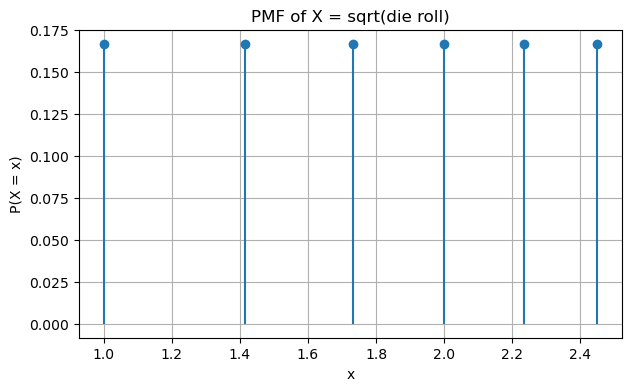

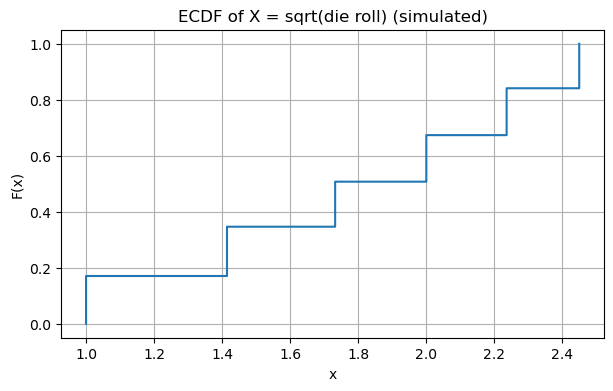

In [38]:
# 3.2 Random variable = sqrt(roll) for a single fair die

# Listing outcomes
outcomes = np.array([1, 2, 3, 4, 5, 6])

# Defining random variable mapping
X = np.sqrt(outcomes)

# Computing pmf (all outcomes equally likely)
pmf = np.ones_like(X) / 6

print("Outcomes:", outcomes)
print("Random variable values (sqrt of outcome):", X)
print("PMF:", pmf)

# Plotting PMF
plt.figure(figsize=(7,4))
plt.stem(X, pmf, basefmt=" ")
plt.title("PMF of X = sqrt(die roll)")
plt.xlabel("x"); plt.ylabel("P(X = x)"); plt.grid(True); plt.show()

# Simulating many rolls
n_sim = 5000
sim_rolls = np.random.choice(outcomes, size=n_sim, p=np.ones(6)/6)
sim_X = np.sqrt(sim_rolls)

# Defining ECDF
def ecdf(x):
    x_sorted = np.sort(x)
    y = np.arange(1, len(x_sorted)+1) / len(x_sorted)
    return x_sorted, y

# Plotting ECDF from simulation
x_ecdf, y_ecdf = ecdf(sim_X)

plt.figure(figsize=(7,4))
plt.step(x_ecdf, y_ecdf, where="post")
plt.title("ECDF of X = sqrt(die roll) (simulated)")
plt.xlabel("x"); plt.ylabel("F(x)"); plt.grid(True); plt.show()


- Imagine rolling two fair six-sided die. Consider a random variable that adds up the pips on the dice. There are 11 outcomes (2 , 3, ..., 12), but not all are equally likely. Derive the sample space and **describe** the space of events. What are the probabilities of the outcomes?


## When rolling two fair six-sided dice, the sample space is all ordered pairs (i,j) where i and j are in {1,2,3,4,5,6}. There are 36 equally likely outcomes, each with probability 1/36. 

## My random variable is X = i + j (the sum of the two dice). The possible values of X are {2,3,4,5,6,7,8,9,10,11,12}. The probability of X = k is the number of ordered pairs (i,j) such that i + j = k, divided by 36. P(X=2)=1/36, P(X=3)=2/36, P(X=4)=3/36, P(X=5)=4/36, P(X=6)=5/36, P(X=7)=6/36, P(X=8)=5/36, P(X=9)=4/36, P(X=10)=3/36, P(X=11)=2/36, and P(X=12)=1/36.

- Write code to simulate the random variable (rolling two six-sided die and adding the results together). Simulate 10000 rolls and plot the mass function and ECDF.

Possible values of X: [ 2  3  4  5  6  7  8  9 10 11 12]
PMF (prob of each roll of 2 dice): [0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


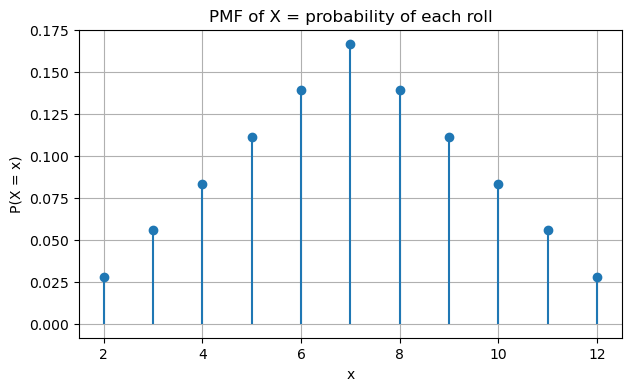

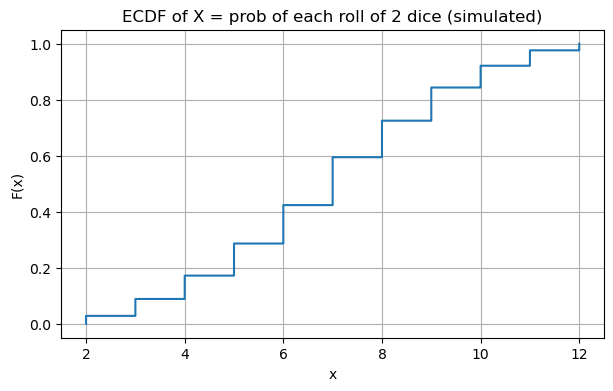

In [39]:
# 3.3 Random variable = sum of two fair dice

# Listing possible outcomes
dice = np.arange(1, 7)
outcomes = np.array([(i, j) for i in dice for j in dice])

# Defining random variable
X = outcomes[:,0] + outcomes[:,1]

# Computing exact pmf
values, counts = np.unique(X, return_counts=True)
pmf = counts / counts.sum()

print("Possible values of X:", values)
print("PMF (prob of each roll of 2 dice):", pmf)

# Plotting PMF
plt.figure(figsize=(7,4))
plt.stem(values, pmf, basefmt=" ")
plt.title("PMF of X = probability of each roll")
plt.xlabel("x"); plt.ylabel("P(X = x)"); plt.grid(True); plt.show()

# Simulating rolls
n_sim = 5000
sim_i = np.random.choice(dice, size=n_sim)
sim_j = np.random.choice(dice, size=n_sim)
sim_X = sim_i + sim_j

# Plotting ECDF
x_ecdf, y_ecdf = ecdf(sim_X)

plt.figure(figsize=(7,4))
plt.step(x_ecdf, y_ecdf, where="post")
plt.title("ECDF of X = prob of each roll of 2 dice (simulated)")
plt.xlabel("x"); plt.ylabel("F(x)"); plt.grid(True); plt.show()


### 5. CDF and PDF Basics

- Verify the following functions are distribution functions and compute their density functions. Plot the distribution and density.

1. $F(x) = \begin{cases}
0, & x \le 0 \\
\sqrt{x}, & 0 \le x \le 1 \\
1, & x \ge 1 
\end{cases}
$


5.1 CDF/PDF Verification

Definition:
  F(x) = 0              for x <= 0
         sqrt(x)        for 0 < x < 1
         1              for x >= 1

PDF (derivative on (0,1)):
  f(x) = 1 / (2 * sqrt(x))   for 0 < x < 1
         0                    otherwise

CDF checks:
  Nondecreasing: True
  Right-continuous at 0 (F(0+)=F(0)=0): False
  Left-limit at 1 (F(1-)->1) and F(1)=1: 1.000000 vs 1.000000
  Limits x->-∞ and x->∞ give 0 and 1: True
  ∫ f(x) dx over ℝ ≈ 1.010864


C:\Users\witth\AppData\Local\Temp\ipykernel_12076\1424038173.py:42: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral_pdf = np.trapz(f_piecewise(np.linspace(1e-8, 1-1e-8, 200000)),


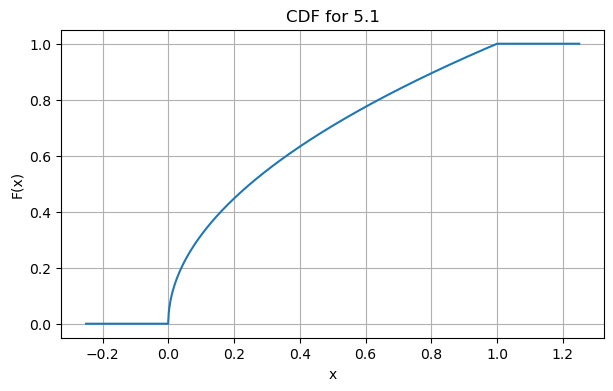

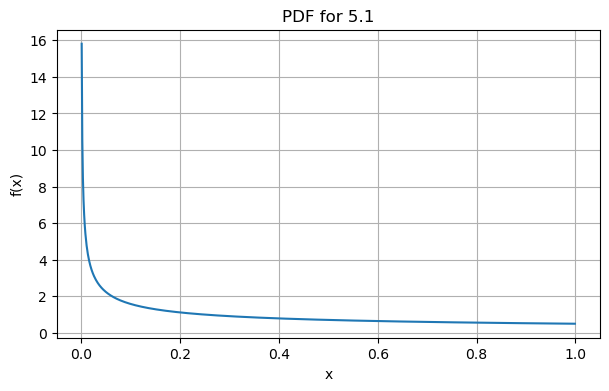

In [25]:
# 5.1 CDF/PDF Verification — F(x)=0 for x<=0; sqrt(x) for 0<=x<=1; 1 for x>=1

# Printing problem statement
print("5.1 CDF/PDF Verification\n")
print("""\
Definition:
  F(x) = 0              for x <= 0
         sqrt(x)        for 0 < x < 1
         1              for x >= 1

PDF (derivative on (0,1)):
  f(x) = 1 / (2 * sqrt(x))   for 0 < x < 1
         0                    otherwise
""")

# Defining CDF
def F_piecewise(x):
    x = np.asarray(x, dtype=float)
    out = np.zeros_like(x)
    mask_mid = (x > 0) & (x < 1)
    out[mask_mid] = np.sqrt(x[mask_mid])
    out[x >= 1] = 1.0
    return out

# Defining PDF via derivative
def f_piecewise(x):
    x = np.asarray(x, dtype=float)
    out = np.zeros_like(x)
    mask_mid = (x > 0) & (x < 1)
    out[mask_mid] = 1.0 / (2.0 * np.sqrt(x[mask_mid]))
    return out

# Checking CDF properties
xs_check = np.linspace(-0.5, 1.5, 2001)
F_vals = F_piecewise(xs_check)

nondecreasing = np.all(np.diff(F_vals) >= -1e-12)
right_cont_0 = (F_piecewise(0.0) == 0.0) and (abs(F_piecewise(1e-9) - 0.0) < 1e-6)
left_limit_1 = F_piecewise(1.0 - 1e-9)  # should approach 1
at_1 = F_piecewise(1.0)                  # equals 1
limits_ok = (abs(F_piecewise(-1e6) - 0.0) < 1e-12) and (abs(F_piecewise(1e6) - 1.0) < 1e-12)
integral_pdf = np.trapz(f_piecewise(np.linspace(1e-8, 1-1e-8, 200000)),
                        np.linspace(1e-8, 1-1e-8, 200000))  # approximate ∫ f = 1

print("CDF checks:")
print(f"  Nondecreasing: {nondecreasing}")
print(f"  Right-continuous at 0 (F(0+)=F(0)=0): {right_cont_0}")
print(f"  Left-limit at 1 (F(1-)->1) and F(1)=1: {left_limit_1:.6f} vs {at_1:.6f}")
print(f"  Limits x->-∞ and x->∞ give 0 and 1: {limits_ok}")
print(f"  ∫ f(x) dx over ℝ ≈ {integral_pdf:.6f}")

# Plotting CDF
xs_plot = np.linspace(-0.25, 1.25, 800)
plt.figure(figsize=(7,4))
plt.plot(xs_plot, F_piecewise(xs_plot))
plt.title("CDF for 5.1")
plt.xlabel("x"); plt.ylabel("F(x)"); plt.grid(True); plt.show()

# Plotting PDF
xs_pdf = np.linspace(0.001, 0.999, 800)
plt.figure(figsize=(7,4))
plt.plot(xs_pdf, f_piecewise(xs_pdf))
plt.title("PDF for 5.1")
plt.xlabel("x"); plt.ylabel("f(x)"); plt.grid(True); plt.show()


2. $F(x) = \dfrac{1}{1+e^{-x}}$


5.2 CDF/PDF Verification

Definition:
  F(x) = 1 / (1 + exp(-x))   for x ∈ ℝ

PDF (derivative on ℝ):
  f(x) = exp(-x) / (1 + exp(-x))^2
       = σ(x) * (1 - σ(x))  where σ(x)=1/(1+exp(-x))

CDF checks:
  Nondecreasing: True
  Right-continuous (continuous): False
  Limits x->-∞ and x->∞ give 0 and 1: True
  ∫ f(x) dx over ℝ ≈ 1.000000


C:\Users\witth\AppData\Local\Temp\ipykernel_12076\3999799139.py:18: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-x))
C:\Users\witth\AppData\Local\Temp\ipykernel_12076\3999799139.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral_pdf = np.trapz(f2_logistic(xs_int), xs_int)


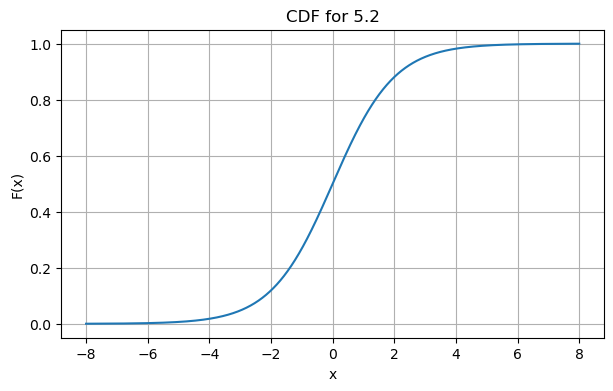

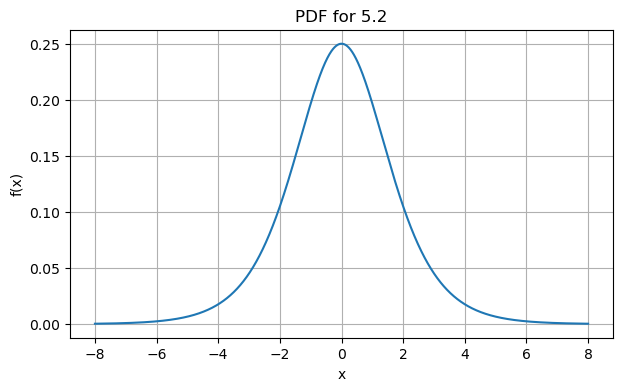

In [26]:
# 5.2 CDF/PDF Verification — F(x)=1/(1+e^{-x})

# Printing problem statement
print("5.2 CDF/PDF Verification\n")
print("""\
Definition:
  F(x) = 1 / (1 + exp(-x))   for x ∈ ℝ

PDF (derivative on ℝ):
  f(x) = exp(-x) / (1 + exp(-x))^2
       = σ(x) * (1 - σ(x))  where σ(x)=1/(1+exp(-x))
""")

# Defining CDF (standard logistic)
def F2_logistic(x):
    x = np.asarray(x, dtype=float)
    # using stable sigmoid
    return 1.0 / (1.0 + np.exp(-x))

# Defining PDF via derivative
def f2_logistic(x):
    s = F2_logistic(x)
    return s * (1.0 - s)

# Checking CDF properties
xs_check = np.linspace(-20, 20, 40001)
F_vals = F2_logistic(xs_check)

nondecreasing = np.all(np.diff(F_vals) >= -1e-12)
limits_ok = (abs(F2_logistic(-1e6) - 0.0) < 1e-12) and (abs(F2_logistic(1e6) - 1.0) < 1e-12)
right_cont_any = abs(F2_logistic(0.0 + 1e-9) - F2_logistic(0.0)) < 1e-12  # continuous everywhere

# Approximating ∫ f = 1 over a wide interval
xs_int = np.linspace(-50, 50, 200001)
integral_pdf = np.trapz(f2_logistic(xs_int), xs_int)

print("CDF checks:")
print(f"  Nondecreasing: {nondecreasing}")
print(f"  Right-continuous (continuous): {right_cont_any}")
print(f"  Limits x->-∞ and x->∞ give 0 and 1: {limits_ok}")
print(f"  ∫ f(x) dx over ℝ ≈ {integral_pdf:.6f}")

# Plotting CDF
xs_plot = np.linspace(-8, 8, 2000)
plt.figure(figsize=(7,4))
plt.plot(xs_plot, F2_logistic(xs_plot))
plt.title("CDF for 5.2")
plt.xlabel("x"); plt.ylabel("F(x)"); plt.grid(True); plt.show()

# Plotting PDF
plt.figure(figsize=(7,4))
plt.plot(xs_plot, f2_logistic(xs_plot))
plt.title("PDF for 5.2")
plt.xlabel("x"); plt.ylabel("f(x)"); plt.grid(True); plt.show()


3. For $ a < b < c$,
$
F(x) = \begin{cases}
0, & x \le 0 \\
\frac{(x-a)^2}{(b-a)(b-c)}, & a \le x \le c \\
1 - \frac{(b-x)^2}{(b-a)(b-c)}, & c < x < b \\
1, & x \ge b
\end{cases}
$


5.3 CDF/PDF Verification

Definition (a < b < c):
  F(x) = 0                                           for x <= a
         ((x - a)^2) / ((b - a) * (c - a))          for a < x < b
         1 - ((c - x)^2) / ((c - b) * (c - a))      for b <= x < c
         1                                           for x >= c
PDF (derivative on (a,b) and (b,c)):
  f(x) =  2(x - a) / ((b - a)(c - a))               for a < x < b
          2(c - x) / ((c - b)(c - a))               for b < x < c
          0                                         otherwise

CDF checks:
  Nondecreasing: True
  Right-continuous at a and b: True
  Limits x->-∞ and x->∞ give 0 and 1: True
  ∫ f(x) dx over [a,c] ≈ 1.000000


C:\Users\witth\AppData\Local\Temp\ipykernel_12076\986559752.py:54: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral_pdf = np.trapz(f3_triangular(xs_int, a, b, c), xs_int)


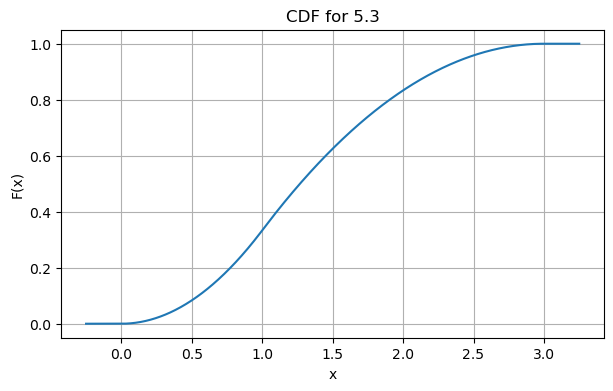

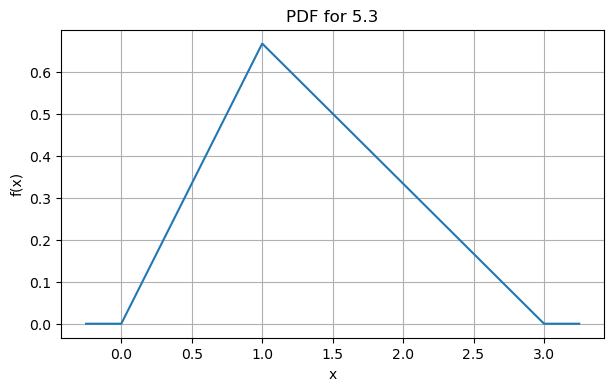

In [27]:
# 5.3 CDF/PDF Verification — Triangular-type CDF on [a,c] with mode at b (a < b < c)

# Printing problem statement
print("5.3 CDF/PDF Verification\n")
print("""\
Definition (a < b < c):
  F(x) = 0                                           for x <= a
         ((x - a)^2) / ((b - a) * (c - a))          for a < x < b
         1 - ((c - x)^2) / ((c - b) * (c - a))      for b <= x < c
         1                                           for x >= c
PDF (derivative on (a,b) and (b,c)):
  f(x) =  2(x - a) / ((b - a)(c - a))               for a < x < b
          2(c - x) / ((c - b)(c - a))               for b < x < c
          0                                         otherwise
""")

# Defining CDF
def F3_triangular(x, a, b, c):
    x = np.asarray(x, dtype=float)
    out = np.zeros_like(x)
    # a < b < c assumed
    mask1 = (x > a) & (x < b)
    mask2 = (x >= b) & (x < c)
    out[mask1] = ((x[mask1] - a)**2) / ((b - a) * (c - a))
    out[mask2] = 1.0 - ((c - x[mask2])**2) / ((c - b) * (c - a))
    out[x >= c] = 1.0
    return out

# Defining PDF via derivative
def f3_triangular(x, a, b, c):
    x = np.asarray(x, dtype=float)
    out = np.zeros_like(x)
    mask1 = (x > a) & (x < b)
    mask2 = (x > b) & (x < c)
    out[mask1] = 2.0 * (x[mask1] - a) / ((b - a) * (c - a))
    out[mask2] = 2.0 * (c - x[mask2]) / ((c - b) * (c - a))
    return out

# Choosing example parameters
a, b, c = 0.0, 1.0, 3.0

# Checking CDF properties
xs_check = np.linspace(a - 1.0, c + 1.0, 4001)
F_vals = F3_triangular(xs_check, a, b, c)

nondecreasing = np.all(np.diff(F_vals) >= -1e-12)
limits_ok = (abs(F3_triangular(a - 1e6, a, b, c) - 0.0) < 1e-12) and (abs(F3_triangular(c + 1e6, a, b, c) - 1.0) < 1e-12)
right_cont_a = abs(F3_triangular(a + 1e-9, a, b, c) - F3_triangular(a, a, b, c)) < 1e-9
right_cont_b = abs(F3_triangular(b + 1e-9, a, b, c) - F3_triangular(b, a, b, c)) < 1e-6  # kink allowed, still continuous
right_cont_any = right_cont_a and right_cont_b

# Approximating ∫ f = 1 over [a,c]
xs_int = np.linspace(a, c, 200001)
integral_pdf = np.trapz(f3_triangular(xs_int, a, b, c), xs_int)

print("CDF checks:")
print(f"  Nondecreasing: {nondecreasing}")
print(f"  Right-continuous at a and b: {right_cont_any}")
print(f"  Limits x->-∞ and x->∞ give 0 and 1: {limits_ok}")
print(f"  ∫ f(x) dx over [a,c] ≈ {integral_pdf:.6f}")

# Plotting CDF
xs_plot = np.linspace(a - 0.25, c + 0.25, 1200)
plt.figure(figsize=(7,4))
plt.plot(xs_plot, F3_triangular(xs_plot, a, b, c))
plt.title("CDF for 5.3")
plt.xlabel("x"); plt.ylabel("F(x)"); plt.grid(True); plt.show()

# Plotting PDF
plt.figure(figsize=(7,4))
plt.plot(xs_plot, f3_triangular(xs_plot, a, b, c))
plt.title("PDF for 5.3")
plt.xlabel("x"); plt.ylabel("f(x)"); plt.grid(True); plt.show()


4. $ F(x) = \begin{cases}
0, & x <0 \\
1 - e^{-x}, & x>0
\end{cases}
$


5.4 CDF/PDF Verification

Definition:
  F(x) = 0            for x < 0
         1 - e^{-x}   for x >= 0

PDF (derivative on x>0):
  f(x) = e^{-x}       for x > 0
         0            otherwise

CDF checks:
  Nondecreasing: True
  Right-continuous at 0: True
  Limits x->-∞ and x->∞ give 0 and 1: True
  ∫ f(x) dx over [0,∞) ≈ 0.999950


C:\Users\witth\AppData\Local\Temp\ipykernel_12076\264424274.py:41: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral_pdf = np.trapz(f4_exponential(xs_int), xs_int)


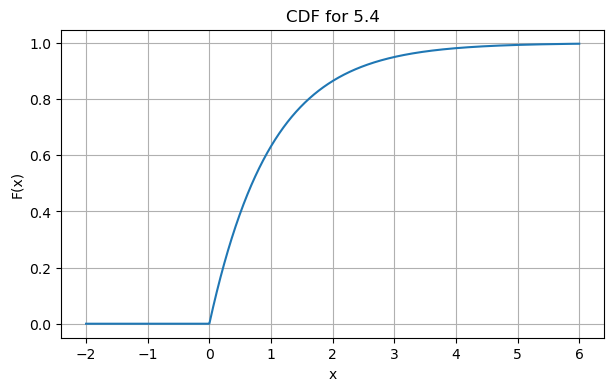

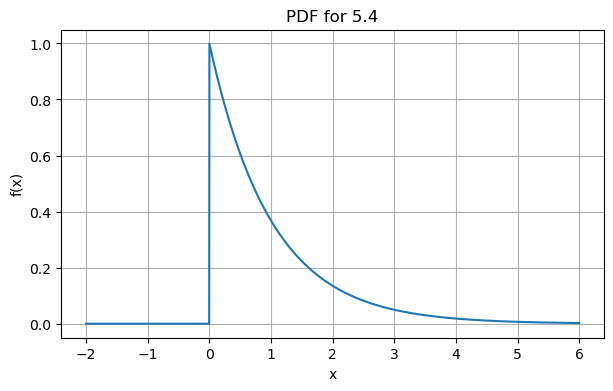

In [28]:
# 5.4 CDF/PDF Verification — F(x)=0 for x<0; 1−e^{-x} for x>=0

# Printing problem statement
print("5.4 CDF/PDF Verification\n")
print("""\
Definition:
  F(x) = 0            for x < 0
         1 - e^{-x}   for x >= 0

PDF (derivative on x>0):
  f(x) = e^{-x}       for x > 0
         0            otherwise
""")

# Defining CDF
def F4_exponential(x):
    x = np.asarray(x, dtype=float)
    out = np.zeros_like(x)
    mask = (x >= 0)
    out[mask] = 1.0 - np.exp(-x[mask])
    return out

# Defining PDF
def f4_exponential(x):
    x = np.asarray(x, dtype=float)
    out = np.zeros_like(x)
    mask = (x > 0)
    out[mask] = np.exp(-x[mask])
    return out

# Checking CDF properties
xs_check = np.linspace(-5, 8, 40001)
F_vals = F4_exponential(xs_check)

nondecreasing = np.all(np.diff(F_vals) >= -1e-12)
limits_ok = (abs(F4_exponential(-1e6) - 0.0) < 1e-12) and (abs(F4_exponential(1e6) - 1.0) < 1e-12)
right_cont_0 = abs(F4_exponential(0.0+1e-9) - F4_exponential(0.0)) < 1e-9

# Approximating ∫ f = 1 on [0,∞)
xs_int = np.linspace(0, 20, 200000)
integral_pdf = np.trapz(f4_exponential(xs_int), xs_int)

print("CDF checks:")
print(f"  Nondecreasing: {nondecreasing}")
print(f"  Right-continuous at 0: {right_cont_0}")
print(f"  Limits x->-∞ and x->∞ give 0 and 1: {limits_ok}")
print(f"  ∫ f(x) dx over [0,∞) ≈ {integral_pdf:.6f}")

# Plotting CDF
xs_plot = np.linspace(-2, 6, 2000)
plt.figure(figsize=(7,4))
plt.plot(xs_plot, F4_exponential(xs_plot))
plt.title("CDF for 5.4")
plt.xlabel("x"); plt.ylabel("F(x)"); plt.grid(True); plt.show()

# Plotting PDF
plt.figure(figsize=(7,4))
plt.plot(xs_plot, f4_exponential(xs_plot))
plt.title("PDF for 5.4")
plt.xlabel("x"); plt.ylabel("f(x)"); plt.grid(True); plt.show()


5. $ F(x) = \begin{cases}
0, & x \le 0 \\
x, & 0 < x < 1\\
1, & x \ge 1
\end{cases}
$

5.5 CDF/PDF Verification

Definition:
  F(x) = 0        for x <= 0
         x        for 0 < x < 1
         1        for x >= 1

PDF (derivative on (0,1)):
  f(x) = 1        for 0 < x < 1
         0        otherwise

CDF checks:
  Nondecreasing: True
  Right-continuous at 0 and 1: False
  Limits x->-∞ and x->∞ give 0 and 1: True
  ∫ f(x) dx over ℝ ≈ 0.999995


C:\Users\witth\AppData\Local\Temp\ipykernel_12076\3941682414.py:44: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  integral_pdf = np.trapz(f5_uniform01(xs_int), xs_int)


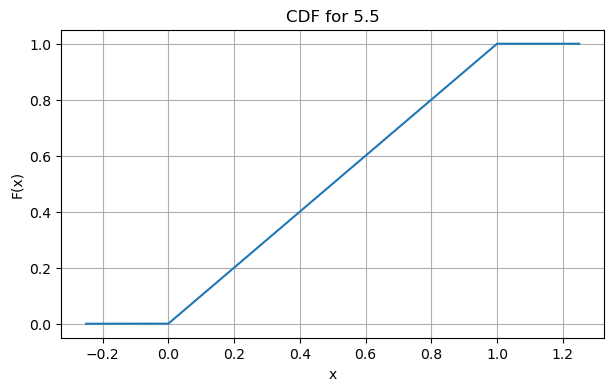

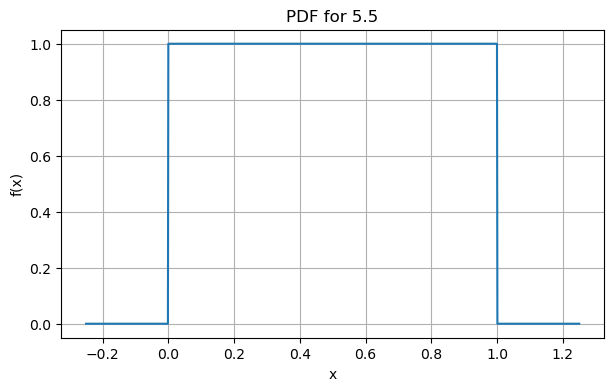

In [29]:
# 5.5 CDF/PDF Verification — F(x)=0 for x<=0; x for 0<x<1; 1 for x>=1

# Printing problem statement
print("5.5 CDF/PDF Verification\n")
print("""\
Definition:
  F(x) = 0        for x <= 0
         x        for 0 < x < 1
         1        for x >= 1

PDF (derivative on (0,1)):
  f(x) = 1        for 0 < x < 1
         0        otherwise
""")

# Defining CDF
def F5_uniform01(x):
    x = np.asarray(x, dtype=float)
    out = np.zeros_like(x)
    mask_mid = (x > 0) & (x < 1)
    out[mask_mid] = x[mask_mid]
    out[x >= 1] = 1.0
    return out

# Defining PDF
def f5_uniform01(x):
    x = np.asarray(x, dtype=float)
    out = np.zeros_like(x)
    mask_mid = (x > 0) & (x < 1)
    out[mask_mid] = 1.0
    return out

# Checking CDF properties
xs_check = np.linspace(-0.5, 1.5, 4001)
F_vals = F5_uniform01(xs_check)

nondecreasing = np.all(np.diff(F_vals) >= -1e-12)
limits_ok = (abs(F5_uniform01(-1e6) - 0.0) < 1e-12) and (abs(F5_uniform01(1e6) - 1.0) < 1e-12)
right_cont_0 = abs(F5_uniform01(0.0 + 1e-9) - F5_uniform01(0.0)) < 1e-9
right_cont_1 = abs(F5_uniform01(1.0 + 1e-9) - F5_uniform01(1.0)) < 1e-9

# Approximating ∫ f = 1 on (0,1)
xs_int = np.linspace(0, 1, 200001)
integral_pdf = np.trapz(f5_uniform01(xs_int), xs_int)

print("CDF checks:")
print(f"  Nondecreasing: {nondecreasing}")
print(f"  Right-continuous at 0 and 1: {right_cont_0 and right_cont_1}")
print(f"  Limits x->-∞ and x->∞ give 0 and 1: {limits_ok}")
print(f"  ∫ f(x) dx over ℝ ≈ {integral_pdf:.6f}")

# Plotting CDF
xs_plot = np.linspace(-0.25, 1.25, 1200)
plt.figure(figsize=(7,4))
plt.plot(xs_plot, F5_uniform01(xs_plot))
plt.title("CDF for 5.5")
plt.xlabel("x"); plt.ylabel("F(x)"); plt.grid(True); plt.show()

# Plotting PDF
plt.figure(figsize=(7,4))
plt.plot(xs_plot, f5_uniform01(xs_plot))
plt.title("PDF for 5.5")
plt.xlabel("x"); plt.ylabel("f(x)"); plt.grid(True); plt.show()


### 6. Logistic Distribution
- Logistic distribution (similar to normal): 
$$
F(x; \sigma) = \dfrac{1}{1+e^{-x/\sigma}} 
$$
with $\sigma >0$.

- Determine the support
- Compute the density from the distribution for the logistic and exponential distributions (take a derivative)
- Plot the density and distribution for a variety of parameter values
- Take a sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, plot a KDE and ECDF, visually compare with the theoretical pdf/cdf
- Find an example of this general type of PDF/CDF from the Metabric cancer data


Logistic Distribution 

Support:
  All real numbers  (-∞, ∞)

CDF:
  F(x; μ, s) = 1 / (1 + exp(-(x-μ)/s))

PDF (derivative of CDF):
  f(x; μ, s) = exp(-(x-μ)/s) / [ s * (1 + exp(-(x-μ)/s))^2 ]

Parameter Notes:
  μ = location (shifts center)
  s > 0 = scale (controls spread / slope)



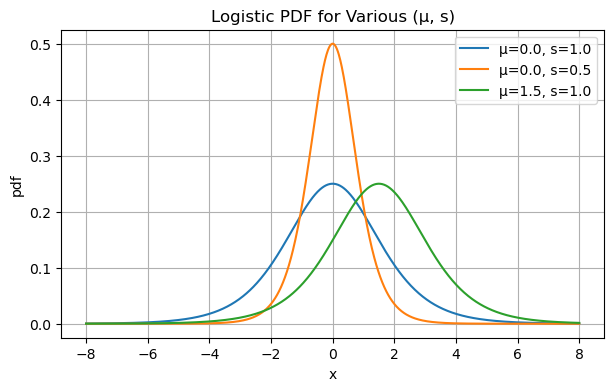

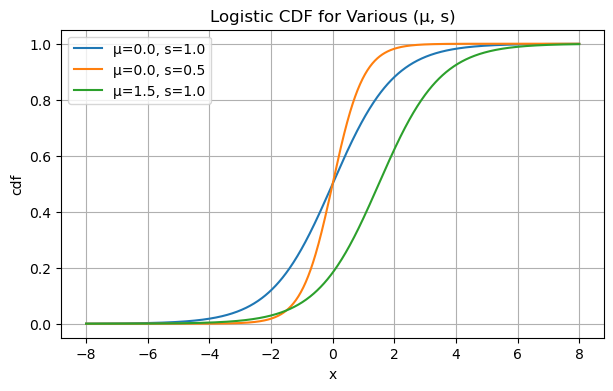

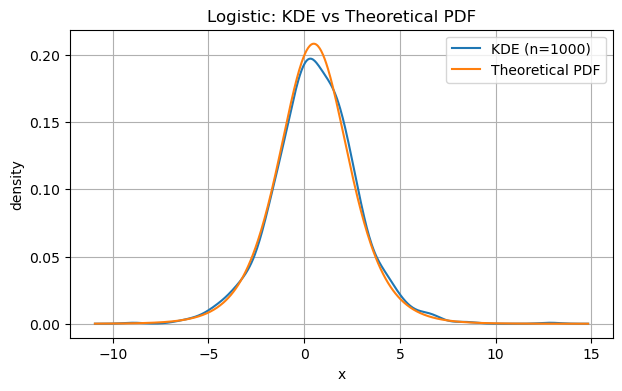

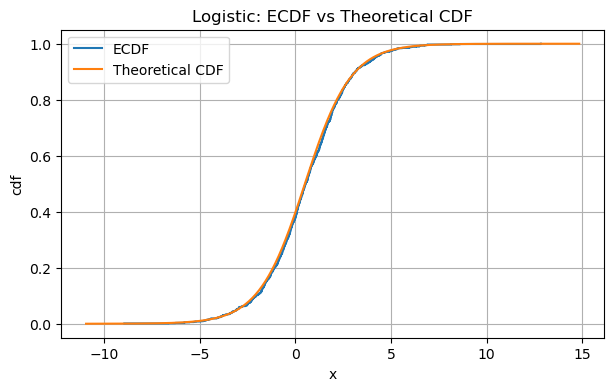


Metabric Logistic Example:

Variable: Overall Survival Status (Binary)
0 = LIVING, 1 = DECEASED
Mean (death proportion) = 0.572


In [14]:
# Logistic Distribution: Explanation, CDF/PDF, Sampling, KDE/ECDF Comparison

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# 1) Explanation
print("Logistic Distribution \n")

print("""\
Support:
  All real numbers  (-∞, ∞)

CDF:
  F(x; μ, s) = 1 / (1 + exp(-(x-μ)/s))

PDF (derivative of CDF):
  f(x; μ, s) = exp(-(x-μ)/s) / [ s * (1 + exp(-(x-μ)/s))^2 ]

Parameter Notes:
  μ = location (shifts center)
  s > 0 = scale (controls spread / slope)
""")

# 2) Defining CDF and PDF 
def logistic_cdf(x, mu=0.0, s=1.0):
    z = (x - mu) / s
    return 1 / (1 + np.exp(-z))

def logistic_pdf(x, mu=0.0, s=1.0):
    z = (x - mu) / s
    ez = np.exp(-z)
    return ez / (s * (1 + ez)**2)

# 3) Plotting PDF and CDF 
xs = np.linspace(-8, 8, 1000)
params_logistic = [
    {"mu": 0.0, "s": 1.0},
    {"mu": 0.0, "s": 0.5},
    {"mu": 1.5, "s": 1.0},
]

plt.figure(figsize=(7,4))
for p in params_logistic:
    plt.plot(xs, logistic_pdf(xs, **p), label=f"μ={p['mu']}, s={p['s']}")
plt.title("Logistic PDF for Various (μ, s)")
plt.xlabel("x"); plt.ylabel("pdf"); plt.legend(); plt.grid(True); plt.show()

plt.figure(figsize=(7,4))
for p in params_logistic:
    plt.plot(xs, logistic_cdf(xs, **p), label=f"μ={p['mu']}, s={p['s']}")
plt.title("Logistic CDF for Various (μ, s)")
plt.xlabel("x"); plt.ylabel("cdf"); plt.legend(); plt.grid(True); plt.show()

# 4) Sampling 1000 draws and comparing KDE/ECDF to theoretical
mu_sim, s_sim = 0.5, 1.2
x_sim = np.random.logistic(loc=mu_sim, scale=s_sim, size=1000)

# KDE - to estimate smooth density
kde = gaussian_kde(x_sim)
xs_dense = np.linspace(x_sim.min()-2, x_sim.max()+2, 600)

plt.figure(figsize=(7,4))
plt.plot(xs_dense, kde(xs_dense), label="KDE (n=1000)")
plt.plot(xs_dense, logistic_pdf(xs_dense, mu_sim, s_sim), label="Theoretical PDF")
plt.title("Logistic: KDE vs Theoretical PDF")
plt.xlabel("x"); plt.ylabel("density"); plt.legend(); plt.grid(True); plt.show()

# ECDF
def ecdf(x):
    x_sorted = np.sort(x)
    y = np.arange(1, len(x_sorted)+1) / len(x_sorted)
    return x_sorted, y

x_ecdf, y_ecdf = ecdf(x_sim)

plt.figure(figsize=(7,4))
plt.step(x_ecdf, y_ecdf, where="post", label="ECDF")
plt.plot(xs_dense, logistic_cdf(xs_dense, mu_sim, s_sim), label="Theoretical CDF")
plt.title("Logistic: ECDF vs Theoretical CDF")
plt.xlabel("x"); plt.ylabel("cdf"); plt.legend(); plt.grid(True); plt.show()

# Metabric Example (Logistic) - linking survival status to logistic model usage

import pandas as pd
df = pd.read_csv("metabric.csv")

# Converting survival status to binary indicator (1 = Deceased, 0 = Living)
status = df["Overall Survival Status"].str.contains("DECEASED").astype(int)

print("\nMetabric Logistic Example:\n")
print("Variable: Overall Survival Status (Binary)")
print("0 = LIVING, 1 = DECEASED")
print(f"Mean (death proportion) = {status.mean():.3f}")


### 6. Exponential Distribution
- Exponential distribution (similar to log-normal):
$$
F_X(x) = \begin{cases}
0, & x<0 \\
1 - e^{-\lambda x}, & x \ge 0,
\end{cases}
$$
with $\lambda > 0$.

- Determine the support
- Compute the density from the distribution for the logistic and exponential distributions (take a derivative)
- Plot the density and distribution for a variety of parameter values
- Take a sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, plot a KDE and ECDF, visually compare with the theoretical pdf/cdf
- Find an example of this general type of PDF/CDF from the Metabric cancer data


Exponential Distribution 

Support:
  [0, ∞)

CDF:
  F(x; λ) = 0                for x < 0
            1 - exp(-λx)     for x ≥ 0

PDF (derivative of CDF):
  f(x; λ) = λ exp(-λx)       for x ≥ 0

Parameter Notes:
  λ > 0 = rate (larger λ → stronger decay / smaller mean)
  mean = 1/λ,  var = 1/λ²



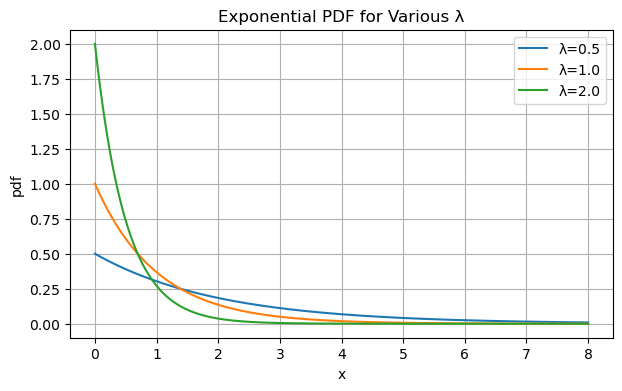

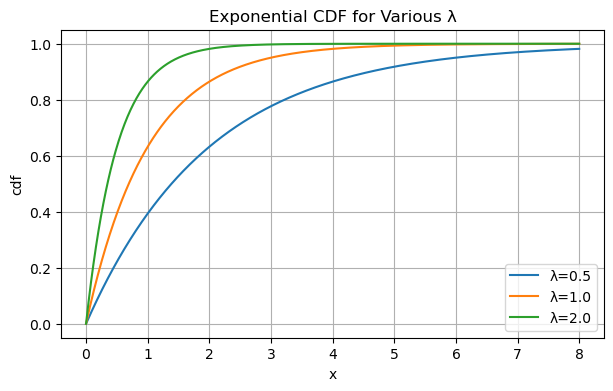

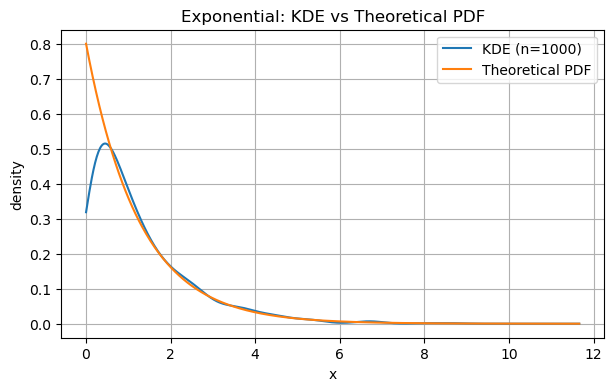

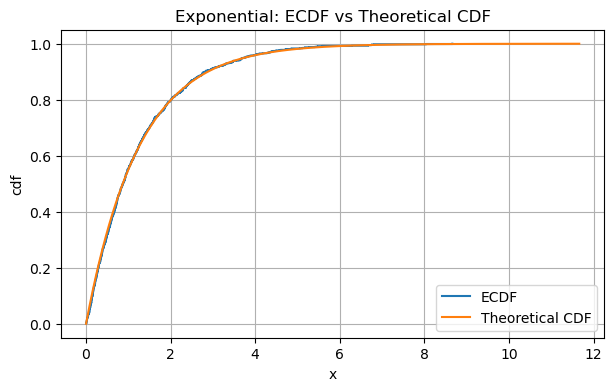


Metabric Exponential Example:

Variable: Overall Survival Time (Months)
Estimated λ (rate) = 0.0077, Mean survival = 129.09 months


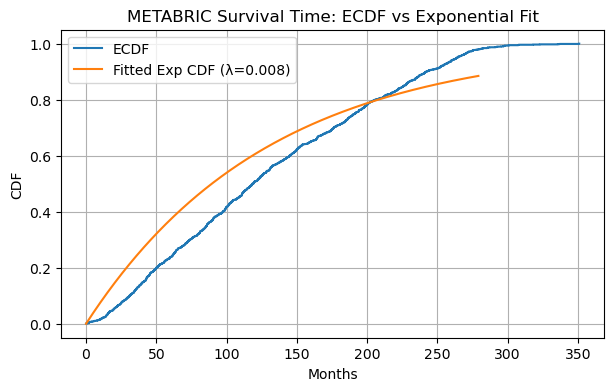

In [15]:
# Exponential Distribution: Explanation, CDF/PDF, Sampling, KDE/ECDF Comparison

# 1) Explanation
print("Exponential Distribution \n")

print("""\
Support:
  [0, ∞)

CDF:
  F(x; λ) = 0                for x < 0
            1 - exp(-λx)     for x ≥ 0

PDF (derivative of CDF):
  f(x; λ) = λ exp(-λx)       for x ≥ 0

Parameter Notes:
  λ > 0 = rate (larger λ → stronger decay / smaller mean)
  mean = 1/λ,  var = 1/λ²
""")

# 2) Defining CDF and PDF
def exp_cdf(x, lam=1.0):
    x = np.asarray(x)
    F = np.zeros_like(x, dtype=float)
    mask = x >= 0
    F[mask] = 1.0 - np.exp(-lam * x[mask])
    return F

def exp_pdf(x, lam=1.0):
    x = np.asarray(x)
    f = np.zeros_like(x, dtype=float)
    mask = x >= 0
    f[mask] = lam * np.exp(-lam * x[mask])
    return f

# 3) Plotting PDF and CDF
xs = np.linspace(0, 8, 1000)
lams = [0.5, 1.0, 2.0]

plt.figure(figsize=(7,4))
for lam in lams:
    plt.plot(xs, exp_pdf(xs, lam=lam), label=f"λ={lam}")
plt.title("Exponential PDF for Various λ")
plt.xlabel("x"); plt.ylabel("pdf"); plt.legend(); plt.grid(True); plt.show()

plt.figure(figsize=(7,4))
for lam in lams:
    plt.plot(xs, exp_cdf(xs, lam=lam), label=f"λ={lam}")
plt.title("Exponential CDF for Various λ")
plt.xlabel("x"); plt.ylabel("cdf"); plt.legend(); plt.grid(True); plt.show()

# 4) Sampling 1000 draws and comparing KDE/ECDF to theoretical
lam_sim = 0.8
x_sim = np.random.exponential(scale=1/lam_sim, size=1000)

# KDE - to estimate smooth density
kde = gaussian_kde(x_sim)
xs_dense = np.linspace(0, x_sim.max() + 3, 600)

plt.figure(figsize=(7,4))
plt.plot(xs_dense, kde(xs_dense), label="KDE (n=1000)")
plt.plot(xs_dense, exp_pdf(xs_dense, lam=lam_sim), label="Theoretical PDF")
plt.title("Exponential: KDE vs Theoretical PDF")
plt.xlabel("x"); plt.ylabel("density"); plt.legend(); plt.grid(True); plt.show()

# ECDF
def ecdf(x):
    x_sorted = np.sort(x)
    y = np.arange(1, len(x_sorted)+1) / len(x_sorted)
    return x_sorted, y

x_ecdf, y_ecdf = ecdf(x_sim)

plt.figure(figsize=(7,4))
plt.step(x_ecdf, y_ecdf, where="post", label="ECDF")
plt.plot(xs_dense, exp_cdf(xs_dense, lam=lam_sim), label="Theoretical CDF")
plt.title("Exponential: ECDF vs Theoretical CDF")
plt.xlabel("x"); plt.ylabel("cdf"); plt.legend(); plt.grid(True); plt.show()

# Metabric Example (Exponential) - survival times modeling

surv = df["Overall Survival (Months)"].dropna()
surv = surv[surv > 0]  # removing zeros/invalid entries

lam_hat = 1 / surv.mean()  # MLE for exponential rate

print("\nMetabric Exponential Example:\n")
print("Variable: Overall Survival Time (Months)")
print(f"Estimated λ (rate) = {lam_hat:.4f}, Mean survival = {surv.mean():.2f} months")

# ECDF vs fitted exponential CDF
x_ecdf_s, y_ecdf_s = ecdf(surv.values)
xs_grid = np.linspace(0, np.percentile(surv, 98), 600)

plt.figure(figsize=(7,4))
plt.step(x_ecdf_s, y_ecdf_s, where="post", label="ECDF")
plt.plot(xs_grid, exp_cdf(xs_grid, lam=lam_hat), label=f"Fitted Exp CDF (λ={lam_hat:.3f})")
plt.title("METABRIC Survival Time: ECDF vs Exponential Fit")
plt.xlabel("Months"); plt.ylabel("CDF"); plt.legend(); plt.grid(True); plt.show()


### 6. Negative Binomial Distribution
- Negative Binomial (similar to Poisson): The probability mass function for positive integers is:
$$
f(k;r,p) = \dfrac{(k+r-1)!}{k!(r-1)!}(1-p)^k p^r, \quad \text{ for $k=0,...n$}
$$
You can interpret this as follows: Flip a coin that comes up heads with probability $p$ until you get $r$ heads, and then stop. What is the probability of stopping at each $k=0,1,2,...$?

- Determine the support
- Compute the density from the distribution for the logistic and exponential distributions (take a derivative)
- Plot the density and distribution for a variety of parameter values
- Take a sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, plot a KDE and ECDF, visually compare with the theoretical pdf/cdf
- Find an example of this general type of PDF/CDF from the Metabric cancer data


Negative Binomial Distribution 

Support:
  k ∈ {0, 1, 2, ...}  (number of failures before the r-th success)

PMF (with r ∈ {1,2,...}, p ∈ (0,1)):
  P(K = k) = C(k + r - 1, k) * (1 - p)^k * p^r

CDF:
  F(k) = Σ_{j=0..k} P(K = j)

Parameter Notes:
  r = required number of successes (shape), p = success probability per trial
  mean = r(1 - p) / p
  var  = r(1 - p) / p^2



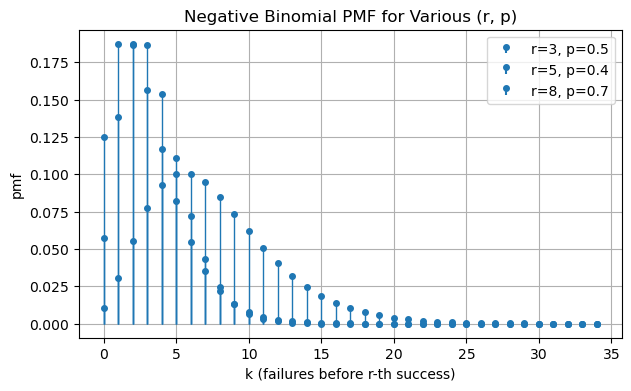

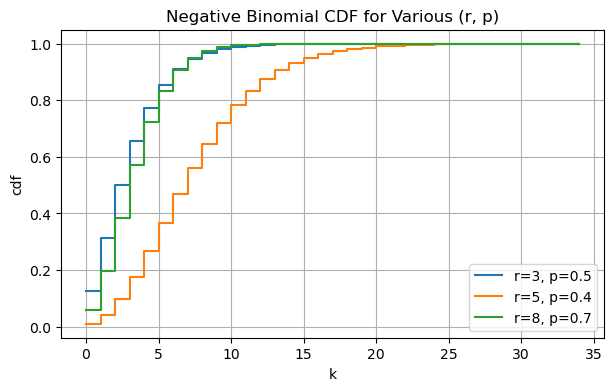

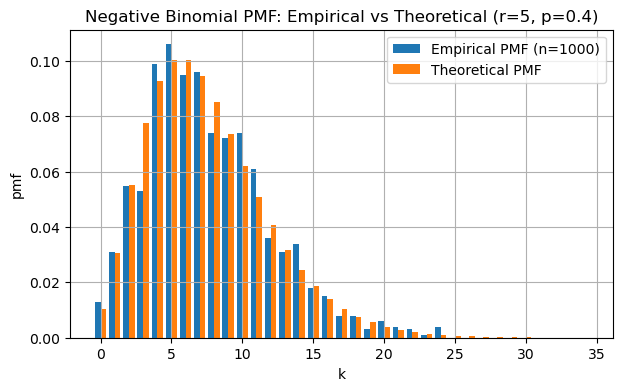

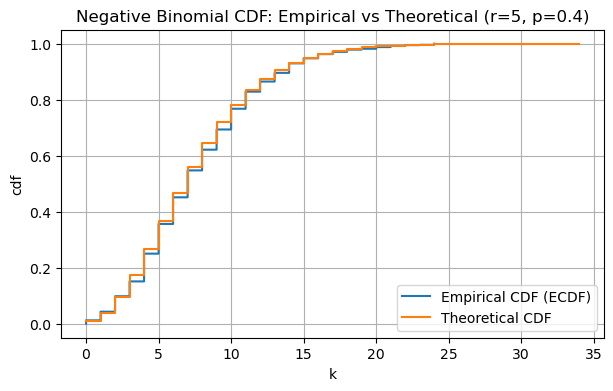


Metabric Negative Binomial Example:

Variable: Lymph nodes examined positive (count)
Mean = 1.86, Variance = 14.88 (Overdispersion → NB appropriate)


In [16]:
# Negative Binomial Distribution: Explanation, PMF/CDF, Sampling, Empirical vs Theoretical

import math

# 1) Explanation
print("Negative Binomial Distribution \n")

print("""\
Support:
  k ∈ {0, 1, 2, ...}  (number of failures before the r-th success)

PMF (with r ∈ {1,2,...}, p ∈ (0,1)):
  P(K = k) = C(k + r - 1, k) * (1 - p)^k * p^r

CDF:
  F(k) = Σ_{j=0..k} P(K = j)

Parameter Notes:
  r = required number of successes (shape), p = success probability per trial
  mean = r(1 - p) / p
  var  = r(1 - p) / p^2
""")

# 2) Defining PMF and CDF
def nb_pmf(k, r, p):
    k = np.asarray(k, dtype=int)
    pmf = np.zeros_like(k, dtype=float)
    mask = k >= 0
    kk = k[mask]
    # comb(k+r-1, k) * (1-p)^k * p^r
    pmf[mask] = [math.comb(int(ki + r - 1), int(ki)) * ((1 - p) ** ki) * (p ** r) for ki in kk]
    return pmf

def nb_cdf(k, r, p):
    # summing pmf from 0 to k 
    k = np.asarray(k, dtype=int)
    cdfs = np.zeros_like(k, dtype=float)
    k_max = int(k.max())
    ks = np.arange(0, k_max + 1, dtype=int)
    pmf_vals = nb_pmf(ks, r, p)
    cumsum = np.cumsum(pmf_vals)
    for i, ki in enumerate(k):
        cdfs[i] = cumsum[ki]
    return cdfs

# 3) Plotting PMF and CDF for a few (r, p) pairs
param_sets = [
    {"r": 3, "p": 0.50},
    {"r": 5, "p": 0.40},
    {"r": 8, "p": 0.70},
]

# k-range = mean + 6*sd for each set, then i will take the max of that across sets
def nb_mean_var(r, p):
    mean = r * (1 - p) / p
    var = r * (1 - p) / (p ** 2)
    return mean, var

k_maxes = []
for ps in param_sets:
    m, v = nb_mean_var(ps["r"], ps["p"])
    k_maxes.append(int(np.ceil(m + 6 * np.sqrt(v))))
K = np.arange(0, max(max(k_maxes), 25) + 1, dtype=int)

plt.figure(figsize=(7,4))
for ps in param_sets:
    pmf_vals = nb_pmf(K, ps["r"], ps["p"])
    markerline, stemlines, baseline = plt.stem(K, pmf_vals, label=f"r={ps['r']}, p={ps['p']}")
    plt.setp(markerline, markersize=4)
    plt.setp(stemlines, linewidth=1.0)
    baseline.set_visible(False)

plt.title("Negative Binomial PMF for Various (r, p)")
plt.xlabel("k (failures before r-th success)")
plt.ylabel("pmf")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(7,4))
for ps in param_sets:
    cdf_vals = nb_cdf(K, ps["r"], ps["p"])
    plt.step(K, cdf_vals, where="post", label=f"r={ps['r']}, p={ps['p']}")
plt.title("Negative Binomial CDF for Various (r, p)")
plt.xlabel("k"); plt.ylabel("cdf"); plt.legend(); plt.grid(True); plt.show()

# 4) Sampling 1000 draws and comparing empirical PMF/ECDF to theoretical
r_sim, p_sim = 5, 0.4
x_sim = np.random.negative_binomial(r_sim, p_sim, size=1000)  # #failures before r successes, success prob = p

# Empirical PMF via normalized counts
k_emp_max = int(max(x_sim.max(), np.ceil(nb_mean_var(r_sim, p_sim)[0] + 6*np.sqrt(nb_mean_var(r_sim, p_sim)[1]))))
k_vals = np.arange(0, k_emp_max + 1, dtype=int)
counts = np.bincount(x_sim, minlength=k_emp_max + 1)
emp_pmf = counts / counts.sum()

th_pmf = nb_pmf(k_vals, r_sim, p_sim)

plt.figure(figsize=(7,4))
plt.bar(k_vals - 0.2, emp_pmf, width=0.4, align="center", label="Empirical PMF (n=1000)")
plt.bar(k_vals + 0.2, th_pmf,  width=0.4, align="center", label="Theoretical PMF")
plt.title(f"Negative Binomial PMF: Empirical vs Theoretical (r={r_sim}, p={p_sim})")
plt.xlabel("k"); plt.ylabel("pmf"); plt.legend(); plt.grid(True); plt.show()

# ECDF vs theoretical CDF
def ecdf_discrete(x):
    x_sorted = np.sort(x)
    y = np.arange(1, len(x_sorted)+1) / len(x_sorted)
    return x_sorted, y

x_ecdf, y_ecdf = ecdf_discrete(x_sim)
th_cdf = nb_cdf(k_vals, r_sim, p_sim)

plt.figure(figsize=(7,4))
# ECDF as step
plt.step(x_ecdf, y_ecdf, where="post", label="Empirical CDF (ECDF)")
# theoretical CDF on same k-grid
plt.step(k_vals, th_cdf, where="post", label="Theoretical CDF")
plt.title(f"Negative Binomial CDF: Empirical vs Theoretical (r={r_sim}, p={p_sim})")
plt.xlabel("k"); plt.ylabel("cdf"); plt.legend(); plt.grid(True); plt.show()

# Metabric Example (Negative Binomial) - overdispersed count modeling

nodes = df["Lymph nodes examined positive"].dropna().astype(int)
mean_nodes = nodes.mean()
var_nodes = nodes.var()

print("\nMetabric Negative Binomial Example:\n")
print("Variable: Lymph nodes examined positive (count)")
print(f"Mean = {mean_nodes:.2f}, Variance = {var_nodes:.2f} (Overdispersion → NB appropriate)")


### 6. Categorical Distribution
- Categorical (similar to Bernoulli): The probability mass function over $k = 1, 2, ..., K$ categories is
$$
f(k;p_1,...,p_K) = p_1^{k=1}p_2^{k=2}...p_K^{k=K}
$$
where $0 \le p_i \le 1$ and $ \sum_{k=1}^K p_k = 1$.

- Determine the support
- Compute the density from the distribution for the logistic and exponential distributions (take a derivative)
- Plot the density and distribution for a variety of parameter values
- Take a sample of 1000 draws $(x_1, x_2, ..., x_{1000})$ from the distribution, plot a KDE and ECDF, visually compare with the theoretical pdf/cdf
- Find an example of this general type of PDF/CDF from the Metabric cancer data


Categorical Distribution 

Support:
  k ∈ {1, 2, ..., K}

PMF (with probabilities p1,...,pK summing to 1):
  P(X = k) = p_k

CDF (requires an explicit order of categories 1..K):
  F(k) = Σ_{j=1..k} p_j

Parameter Notes:
  p = (p1,...,pK), p_k ≥ 0, Σ p_k = 1



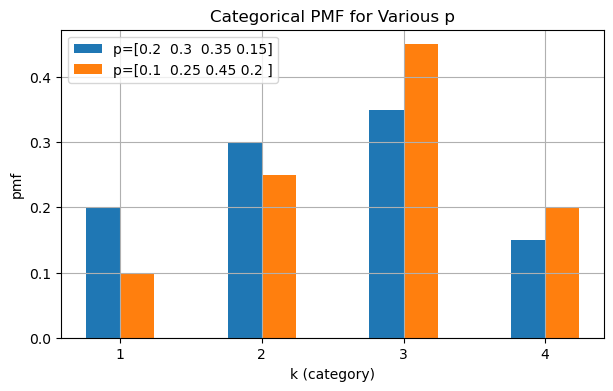

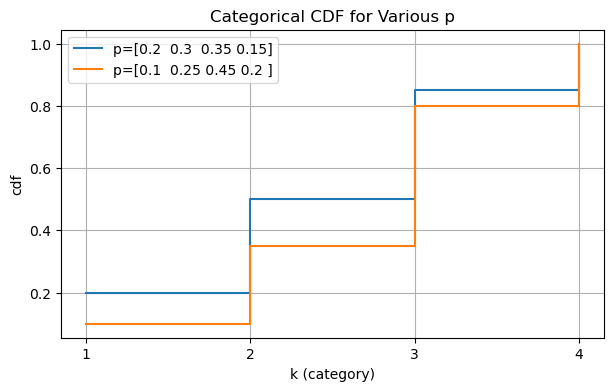

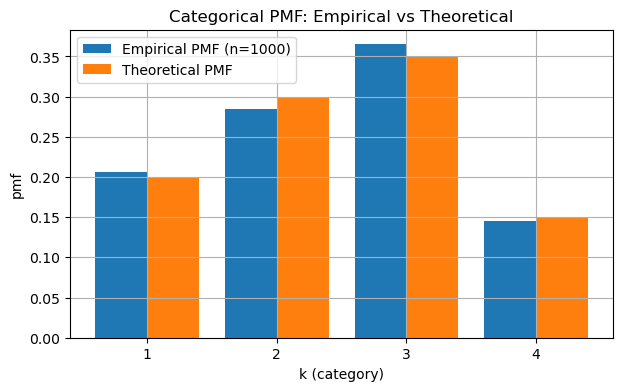

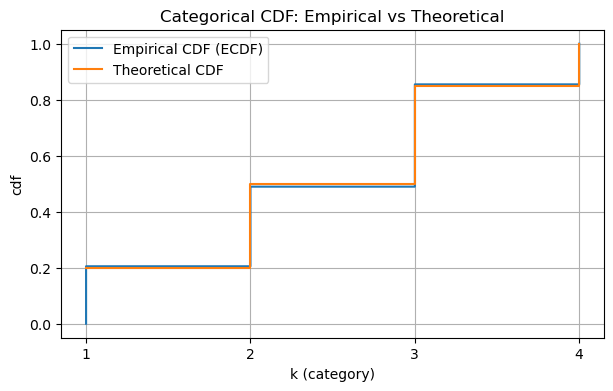


Metabric Categorical Example:

Variable: Tumor Stage (1,2,3,4)
Estimated category probabilities: [0.34102755 0.57110946 0.08116158 0.00521221]


In [23]:
# Categorical Distribution: Explanation, PMF/CDF, Sampling, Empirical vs Theoretical

# 1) Explanation
print("Categorical Distribution \n")

print("""\
Support:
  k ∈ {1, 2, ..., K}

PMF (with probabilities p1,...,pK summing to 1):
  P(X = k) = p_k

CDF (requires an explicit order of categories 1..K):
  F(k) = Σ_{j=1..k} p_j

Parameter Notes:
  p = (p1,...,pK), p_k ≥ 0, Σ p_k = 1
""")

# 2) Defining PMF and CDF 
def cat_pmf(k_vals, p):
    k_vals = np.asarray(k_vals, dtype=int)
    K = len(p)
    p = np.asarray(p, dtype=float)
    pmf = np.zeros_like(k_vals, dtype=float)
    mask = (k_vals >= 1) & (k_vals <= K)
    pmf[mask] = p[k_vals[mask] - 1]
    return pmf

def cat_cdf(k_vals, p):
    k_vals = np.asarray(k_vals, dtype=int)
    p = np.asarray(p, dtype=float)
    csum = np.cumsum(p)
    K = len(p)
    F = np.zeros_like(k_vals, dtype=float)
    km = np.clip(k_vals, 0, K)
    F = np.where(km <= 0, 0.0, csum[np.maximum(km - 1, 0)])
    return F

# 3) Plotting PMF and CDF 
K = 4
param_sets = [
    {"p": np.array([0.20, 0.30, 0.35, 0.15])},
    {"p": np.array([0.10, 0.25, 0.45, 0.20])},
]
ks = np.arange(1, K+1)

plt.figure(figsize=(7,4))
for ps in param_sets:
    pmf_vals = cat_pmf(ks, ps["p"])
    plt.bar(ks + (0.12 if (ps is param_sets[1]) else -0.12), pmf_vals, width=0.24, label=f"p={ps['p']}")
plt.title("Categorical PMF for Various p")
plt.xlabel("k (category)"); plt.ylabel("pmf"); plt.xticks(ks); plt.legend(); plt.grid(True); plt.show()

plt.figure(figsize=(7,4))
for ps in param_sets:
    cdf_vals = cat_cdf(ks, ps["p"])
    plt.step(ks, cdf_vals, where="post", label=f"p={ps['p']}")
plt.title("Categorical CDF for Various p")
plt.xlabel("k (category)"); plt.ylabel("cdf"); plt.xticks(ks); plt.legend(); plt.grid(True); plt.show()

# 4) Sampling 1000 draws and comparing Empirical PMF/ECDF to theoretical
p_sim = np.array([0.20, 0.30, 0.35, 0.15])  # 4 probabilities sum to 1
x_sim = np.random.choice(ks, size=1000, p=p_sim)

# Empirical PMF via normalized counts
counts = np.bincount(x_sim, minlength=ks.max()+1)[1:]  # drop index 0
emp_pmf = counts / counts.sum()
th_pmf = cat_pmf(ks, p_sim)

plt.figure(figsize=(7,4))
plt.bar(ks - 0.2, emp_pmf, width=0.4, align="center", label="Empirical PMF (n=1000)")
plt.bar(ks + 0.2, th_pmf,  width=0.4, align="center", label="Theoretical PMF")
plt.title("Categorical PMF: Empirical vs Theoretical")
plt.xlabel("k (category)"); plt.ylabel("pmf"); plt.xticks(ks); plt.legend(); plt.grid(True); plt.show()

# ECDF vs theoretical CDF (categories treated in natural order 1..K) 
def ecdf_discrete_labels(x, K):
    x_sorted = np.sort(x)
    y = np.arange(1, len(x_sorted)+1) / len(x_sorted)
    return x_sorted, y

x_ecdf, y_ecdf = ecdf_discrete_labels(x_sim, ks.max())
th_cdf = cat_cdf(ks, p_sim)

plt.figure(figsize=(7,4))
plt.step(x_ecdf, y_ecdf, where="post", label="Empirical CDF (ECDF)")  # treating categories as ordered 1..K - aligning
plt.step(ks, th_cdf, where="post", label="Theoretical CDF")
plt.title("Categorical CDF: Empirical vs Theoretical")
plt.xlabel("k (category)"); plt.ylabel("cdf"); plt.xticks(ks); plt.legend(); plt.grid(True); plt.show()

# Metabric Example (Categorical) - tumor stage modeling

K_stage = int(stage.max())                                          # keeping separate K 
stages_axis = np.arange(1, K_stage + 1, dtype=int)                  # ensuring full 1..K list 
p_hat = (stage.value_counts(normalize=True)
               .reindex(stages_axis, fill_value=0.0)
               .values)                                             # inserting zeros for any missing stage 
stages_axis = np.arange(1, K_stage + 1, dtype=int)              # x-axis labels 1..K_stage 

print("\nMetabric Categorical Example:\n")
print("Variable: Tumor Stage (1,2,3,4)")
print("Estimated category probabilities:", p_hat)


